# 计数图像中的亮对象
在生物学背景下，图像处理的一个常见用例是计算被低强度背景包围的高信号强度斑点。在这种情况下，阈值处理是首选方法。我们使用Otsu的阈值处理方法来演示（Otsu等人，IEEE系统、人与控制论交易，第9卷（1），1979年）

In [1]:
import pyclesperanto_prototype as cle

from skimage.io import imread, imsave, imshow
import matplotlib
import numpy as np

# initialize GPU
cle.select_device("GTX")

<Apple M1 Max on Platform: Apple (2 refs)>

Loaded image size: (254, 256)


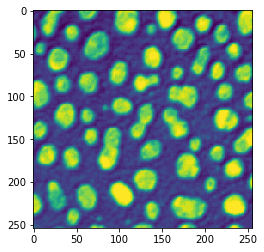

In [2]:
# load data
image = imread('../../data/blobs.tif')
print("Loaded image size: " + str(image.shape))

cle.imshow(image)

我们刚刚设置了一个简单的图像处理工作流程，得到一个标签图像。

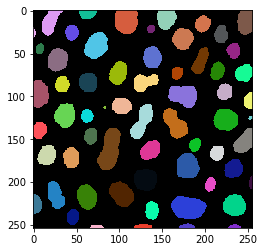

In [3]:
# process the image
blurred = cle.gaussian_blur(image, sigma_x=1, sigma_y=1)
binary = cle.threshold_otsu(blurred)
labeled = cle.connected_components_labeling_box(binary)

# show result
cle.imshow(labeled, labels=True)

标签图像中的最大强度对应于对象的数量。

In [4]:
num_labels = cle.maximum_of_all_pixels(labeled)
print("Number of objects in the image: " + str(num_labels))

Number of objects in the image: 62.0


## 练习
移除接触图像边界的标签，并再次计数对象。